In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

In [10]:
df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)
df.head()

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0
2013-01-03,00:00,69,2,21,6,22,1,0,0
2013-01-04,00:00,80,0,22,4,16,0,125,0
2013-01-05,00:00,52,4,19,3,12,0,97,0


In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-09-09', '2013-09-10', '2013-09-11', '2013-09-12',
               '2013-09-13', '2013-09-14', '2013-09-15', '2013-09-16',
               '2013-09-17', '2013-09-18'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

In [12]:
df.columns

Index(['Unnamed: 1', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc', 'PierDup',
       'Rachel1', 'Totem_Laurier'],
      dtype='object')

In [13]:
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


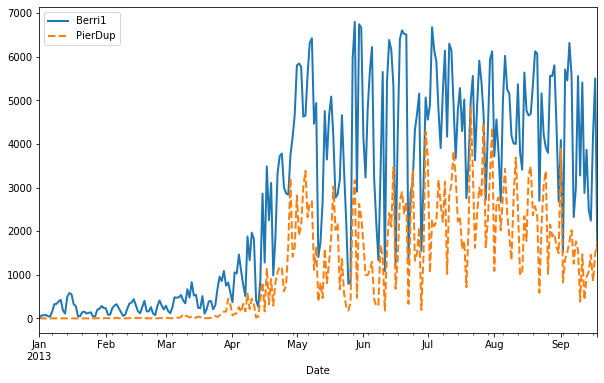

In [15]:
df[ ['Berri1', 'PierDup'] ].plot(figsize=(10,6), style=['-', '--'], lw=2)

In [16]:
df_week = df.groupby(df.index.weekday).sum()
df_week.head()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,
0,106826,51646,68087,129982,69767,44500,119211,72883
1,117244,54656,76974,141217,74299,40679,123533,76559
2,120434,59604,79033,145860,80437,42564,125173,79501
3,115193,52340,76273,141424,73668,36349,120684,74540
4,105701,44252,71605,127526,64385,36850,118556,71426


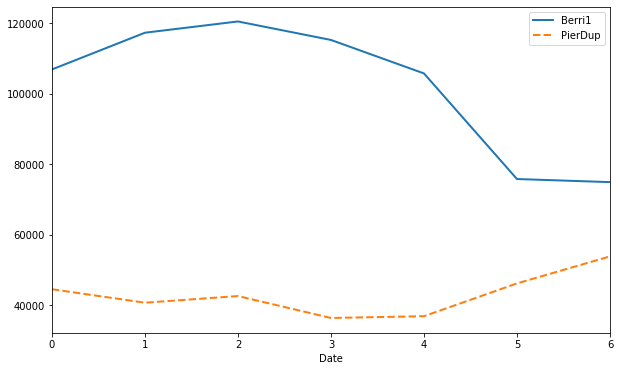

In [17]:
df_week[ ['Berri1', 'PierDup'] ].plot(figsize=(10,6), style=['-', '--'], lw=2)

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thu'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat'),
 Text(0, 0, 'Sun')]

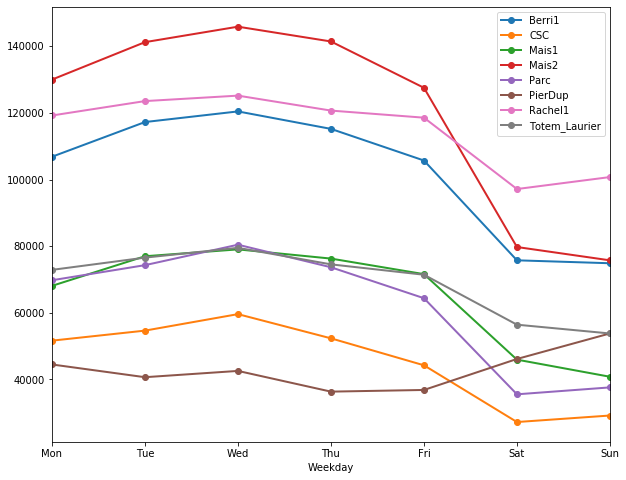

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
df_week.plot(style='-o', lw=2, ax=ax)
ax.set_xlabel('Weekday')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

Text(0.5, 0, 'Month')

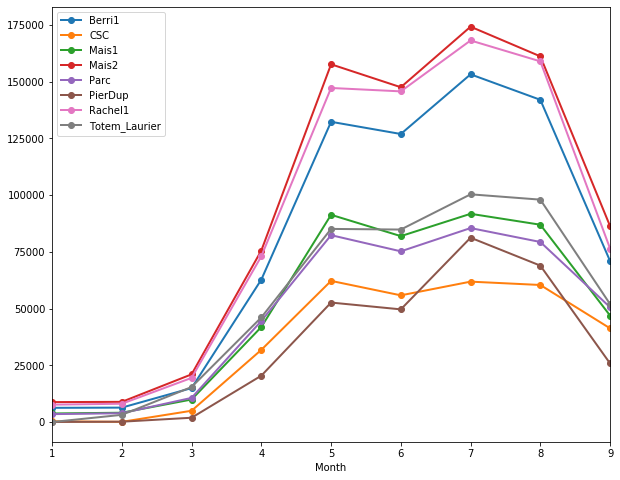

In [25]:
df_month = df.groupby(df.index.month).sum()
fig, ax = plt.subplots(1,1,figsize=(10,8))
df_month.plot(style='-o', lw=2, ax=ax)
ax.set_xlabel('Month')

# Titanic

In [28]:
tt = pd.read_csv('data/titanic/titanic_train.csv')

In [29]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
tt.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [39]:
id1 = tt.groupby(['Sex','Pclass']).Survived.value_counts()

In [40]:
id2 = tt.groupby(['Pclass','Sex']).Survived.value_counts()

In [47]:
id = pd.crosstab([tt.Pclass, tt.Sex], tt.Survived)
id.sum(axis=1)

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [48]:
id.div(id.sum(axis=1), axis=0)

Survived              0         1
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

In [49]:
id = pd.crosstab([tt.Pclass, tt.Sex, tt.Age], tt.Survived)
id.sum(axis=1)

Pclass  Sex     Age 
1       female  2.0     1
                14.0    1
                15.0    1
                16.0    3
                17.0    2
                       ..
3       male    59.0    1
                61.0    1
                65.0    1
                70.5    1
                74.0    1
Length: 283, dtype: int64

In [50]:
id.div(id.sum(axis=1), axis=0)

Survived              0    1
Pclass Sex    Age           
1      female 2.0   1.0  0.0
              14.0  0.0  1.0
              15.0  0.0  1.0
              16.0  0.0  1.0
              17.0  0.0  1.0
...                 ...  ...
3      male   59.0  1.0  0.0
              61.0  1.0  0.0
              65.0  1.0  0.0
              70.5  1.0  0.0
              74.0  1.0  0.0

[283 rows x 2 columns]

In [52]:
pd.crosstab([tt.Pclass, tt.Sex], tt.Age)

Age            0.42   0.67   0.75   0.83   0.92   1.00   2.00   3.00   4.00   \
Pclass Sex                                                                     
1      female      0      0      0      0      0      0      1      0      0   
       male        0      0      0      0      1      0      0      0      1   
2      female      0      0      0      0      0      0      1      1      2   
       male        0      1      0      2      0      2      1      2      0   
3      female      0      0      2      0      0      2      4      1      3   
       male        1      0      0      0      0      3      3      2      4   

Age            5.00   ...  62.00  63.00  64.00  65.00  66.00  70.00  70.50  \
Pclass Sex            ...                                                    
1      female      0  ...      1      1      0      0      0      0      0   
       male        0  ...      2      0      2      2      0      1      0   
2      female      1  ...      0      0      0      0      0      0      0   
       male        0  ...      1      0      0      0      1      1      0   
3      female      3  ...      0      1      0      0      0      0      0   
       male        0  ...      0      0      0      1      0      0      1   

Age            71.00  74.00  80.00  
Pclass Sex                          
1      female      0      0      0  
       male        2      0      1  
2      female      0      0      0  
       male        0      0      0  
3      female      0      0      0  
       male        0      1      0  

[6 rows x 88 columns]

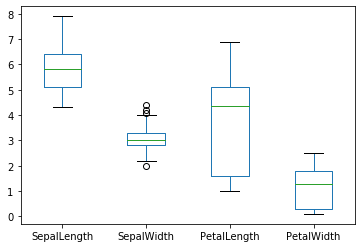

In [54]:
iris = pd.read_csv('data/iris.csv')
iris.iloc[:, 0:4].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DDD2B9848>,
      dtype=object)

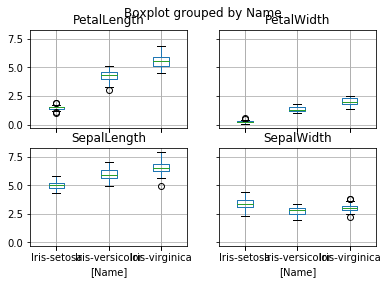

In [55]:
iris.boxplot(by='Name')

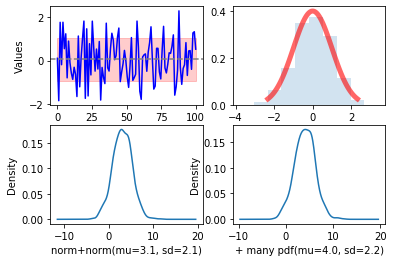

In [56]:
%run demo_code/1.2.Gaussian_distributions.py

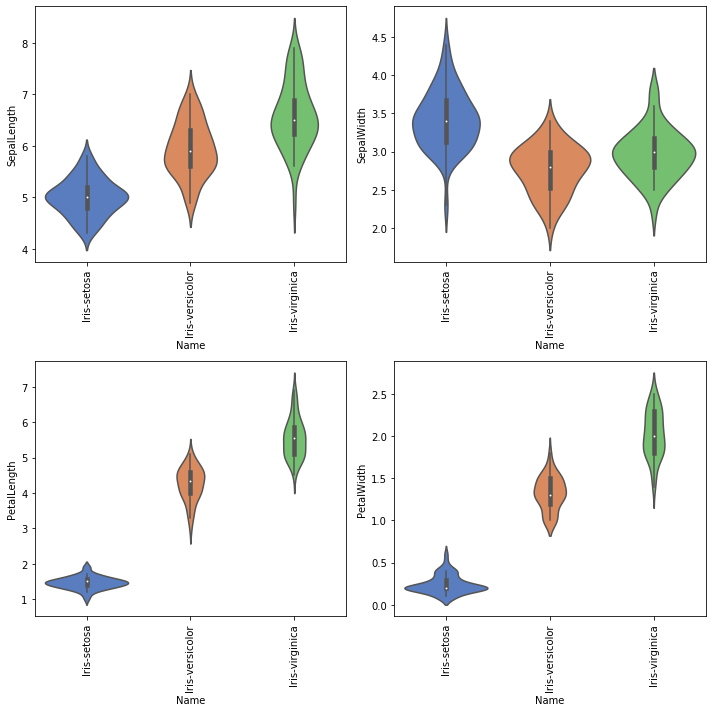

In [57]:
import seaborn as sns
#in width, height in inches
fig = plt.figure(figsize=(10,10))
i = 0
for y in iris.columns[0:4]:
    fig.add_subplot(2,2,i+1)
    sns.violinplot(x="Name", y=y,data=iris, palette="muted")
    plt.xticks(rotation=90)    
    i += 1
fig.tight_layout()


# Multiprocessing

In [58]:
from joblib import Parallel, delayed
import requests, time 


def download(url):
     r = requests.get(url)
     return len(r.text)

st = time.time()
download("https://www.google.co.in")
print(time.time()-st )
st = time.time()
results = Parallel(n_jobs=-1, backend="threading")(
             map(delayed(download), ["https://www.google.co.in" for _ in range(10)]))
time.time()-st

0.2813103199005127


1.193272352218628